# 1.0 Preparing Modules and Files

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import plotly.express as px

In [2]:
adf = pd.read_csv(r"D:\Saif\Datasets\Egypt_Houses_Price.csv")

## Data Dictionary

 - Type: style of archticture.
     - 'Duplex', A duplex house plan has two living units attached to each other, either next to each other as townhouses, or above     each other like apartments. one of two properties on a single lot (land).
     - 'Apartment', a self-contained housing unit that occupies part of a building.
     - 'Penthouse', a flat (property) on the top floor of a tall building.
     - 'Studio', non-residential properties of very small areas.
     - 'Chalet', beach houses (less often pool houses and apartments) built in any style of architecture, (apartments, villas, etc.) usually of small areas.
     - 'Standalone Villa', large, single-family homes that are detached from other buildings.
     - 'Twin House', two living units attached to each other side by side, usually are mirror images of each other. despite sharing a wall; each of the properties is built upon its own lot (land).
     - 'Town House', a unit in a row of joined houses sharing side walls.


- Price: Price of the property.
- Area: Area of the property.
- Furnished: wether the residence has furniture.
- Payment_Option: Payment method, Cash / Installment.
- Delivery_Date: Years / months till the property is delivered.
- Delivery_Term: interior state of the property.

# 2.0 Exploratory Data Analysis

In [3]:
adf.describe()

Type    Price Bedrooms Bathrooms   Area Furnished    Level  \
count       27361    27359    27158     27190  26890     27361    27361   
unique         11     4182       22        22   1073         3       14   
top     Apartment  3000000        3         2  120.0        No  Unknown   
freq         8506      311     9784      7753    663     16500    10439   

       Compound       Payment_Option  Delivery_Date Delivery_Term  \
count     27361                27361          27361         27361   
unique      560                    4             10             5   
top     Unknown  Cash or Installment  Ready to move      Finished   
freq      11068                10842          12142         14375   

                          City  
count                    27361  
unique                     183  
top     New Cairo - El Tagamoa  
freq                      6789

In [4]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


## Insights:

- The dataset has 27361 entries (rows), and 12 columns.
- There are dozens of null values within at least 4 columns.
- All the 12 columns are in 'Object' format, although attributes like 'Price' and 'Area' should be numeric.
- Columns 'Level' and 'Compound' have no null values, but missing values are represented in strings of 'Unknown', and likely with all columns.
- Data cleaning should involve dropping 'null' values along with the critical 'Unknown' values in numeric columns.

# 3.0 Data Cleaning

## 3.1 Dropping 'null' Values

In [5]:
adf.isnull().sum() 
# cells designated 'null' do not express all the missing values,
# bcuz all columns are in 'object' dtype and some missing values are represented as strings e.g. 'unknown', 'missing'

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [6]:
# A copy for backup
df = adf.copy()

In [7]:
df = df.dropna()


In [8]:
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

## 3.2 Cleaning inconvertible 'object' rows (Strings) in numeric columns

- do **Price** and **Area** columns have 'Unknown' rows or any similar text for missing values?

In [9]:
# dtype assignment

df[['Price', 'Area']] = df[['Price', 'Area']].apply(pd.to_numeric, errors='coerce')

# errors='coerce' converts any non numeric Price / Area cell to NaN values

In [10]:
df.loc[df['Price'].isnull()].head(10)

Type  Price Bedrooms Bathrooms  Area Furnished    Level Compound  \
216   Unknown    NaN  Unknown   Unknown   NaN   Unknown  Unknown  Unknown   
1186  Unknown    NaN  Unknown   Unknown   NaN   Unknown  Unknown  Unknown   
2793  Unknown    NaN  Unknown   Unknown   NaN   Unknown  Unknown  Unknown   
3655  Unknown    NaN  Unknown   Unknown   NaN   Unknown  Unknown  Unknown   
3830  Unknown    NaN  Unknown   Unknown   NaN   Unknown  Unknown  Unknown   
4236  Unknown    NaN  Unknown   Unknown   NaN   Unknown  Unknown  Unknown   
4407  Unknown    NaN  Unknown   Unknown   NaN   Unknown  Unknown  Unknown   
4468  Unknown    NaN  Unknown   Unknown   NaN   Unknown  Unknown  Unknown   
5792  Unknown    NaN  Unknown   Unknown   NaN   Unknown  Unknown  Unknown   
5875  Unknown    NaN  Unknown   Unknown   NaN   Unknown  Unknown  Unknown   

       Payment_Option Delivery_Date Delivery_Term  \
216   Unknown Payment       Unknown      Unknown    
1186  Unknown Payment       Unknown      Unknown    
2793  Unknown Payment       Unknown      Unknown    
3655  Unknown Payment       Unknown      Unknown    
3830  Unknown Payment       Unknown      Unknown    
4236  Unknown Payment       Unknown      Unknown    
4407  Unknown Payment       Unknown      Unknown    
4468  Unknown Payment       Unknown      Unknown    
5792  Unknown Payment       Unknown      Unknown    
5875  Unknown Payment       Unknown      Unknown    

                                      City  
216   Only in Apartments & Duplex for Sale  
1186  Only in Apartments & Duplex for Sale  
2793  Only in Apartments & Duplex for Sale  
3655  Only in Apartments & Duplex for Sale  
3830  Only in Apartments & Duplex for Sale  
4236  Only in Apartments & Duplex for Sale  
4407  Only in Apartments & Duplex for Sale  
4468  Only in Apartments & Duplex for Sale  
5792  Only in Apartments & Duplex for Sale  
5875  Only in Apartments & Duplex for Sale

In [11]:
df.isnull().sum()

Type               0
Price             37
Bedrooms           0
Bathrooms          0
Area              36
Furnished          0
Level              0
Compound           0
Payment_Option     0
Delivery_Date      0
Delivery_Term      0
City               0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

Type              0
Price             0
Bedrooms          0
Bathrooms         0
Area              0
Furnished         0
Level             0
Compound          0
Payment_Option    0
Delivery_Date     0
Delivery_Term     0
City              0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26693 entries, 0 to 27359
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            26693 non-null  object 
 1   Price           26693 non-null  float64
 2   Bedrooms        26693 non-null  object 
 3   Bathrooms       26693 non-null  object 
 4   Area            26693 non-null  float64
 5   Furnished       26693 non-null  object 
 6   Level           26693 non-null  object 
 7   Compound        26693 non-null  object 
 8   Payment_Option  26693 non-null  object 
 9   Delivery_Date   26693 non-null  object 
 10  Delivery_Term   26693 non-null  object 
 11  City            26693 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.6+ MB


## 3.3 Checking the Integrity and Accuracy of Non-Numeric Columns

In [15]:
df.Furnished.unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [16]:
df.Level.unique()

array(['7', '10+', '1', '10', 'Ground', 'Highest', '3', '2', '4', '9',
       '5', '8', '6', 'Unknown'], dtype=object)

In [17]:
com1 = df.Compound.unique() # >> numpy array
sorted(com1)

# sort_values(): Specifically for pandas DataFrames (and Series).
# np.sort(): Specifically for numpy arrays.
# sorted(L): General-purpose, for any iterable (e.g., lists, tuples), Python built-in function.

# np.sort example:
# com01 = df['Compound'].unique()
# np.sort(com01)

['2020 Compound',
 '90 Avenue',
 'ABHA',
 'AZAD',
 'Abu Al-Hool',
 'Aeon',
 'Aghadir',
 'Agora',
 'Aida Beach',
 'Al Burouj',
 'Al Diyar',
 'Al Hayah',
 'Al Hegaz',
 'Al Maamourah El Gadida',
 'Al Maqsad',
 'Al Nasayem',
 'Al Rabwa',
 'Al Reviera',
 'Al Shorouk',
 'Al Solaimaneyah Golf City',
 'Al Yasmine',
 'Al-Jazeera',
 'Alamein Towers',
 'Alex West',
 'Allegria',
 'Alma',
 'Almanal',
 'Almaza Bay',
 'Amexco paradise',
 'Amigo',
 'Amorada',
 'Amoun',
 'Amwaj',
 'Anakaji',
 'Andalus',
 'Aqua View',
 'Arabella Park',
 'Areej',
 'Arena City Towers',
 'Aria',
 'Armonia',
 'Aroma Residence',
 'Asala',
 'Ashgar City',
 'Assiut University',
 'Aswar',
 'Atic',
 'Atika',
 'Atrio',
 'Azha',
 'Azzar',
 'BOHO',
 'Badya Palm Hills',
 'Baet El Masria',
 'Bamboo Palm Hills',
 'Baron City',
 'BatterSea',
 'Bavaria Town',
 'Baymount',
 'Bedaya',
 'Beit Al Watan',
 'Bella Vista',
 'Bellagio',
 'Belle Vie',
 'Beta Gardens',
 'Beta Greens',
 'Beverly Hills',
 'Bianchi',
 'Bienestar',
 'Bloomfields',
 '

In [18]:
df.Type.unique()


array(['Duplex', 'Apartment', 'Penthouse', 'Studio', 'Chalet',
       'Standalone Villa', 'Twin house', 'Town House',
       'Stand Alone Villa', 'Twin House'], dtype=object)

In [19]:
cit = df.City.unique()
sorted(cit)

['(View phone number)',
 '10th of Ramadan',
 '15 May City',
 '6th of October',
 'Abasiya',
 'Abu Qir',
 'Abu Rawash',
 'Abu Talat',
 'Aga',
 'Agami',
 'Agouza',
 'Ain Shams',
 'Ain Sukhna',
 'Al Amiriyyah',
 'Al Hadrah',
 'Al Ibrahimiyyah',
 'Al Manial',
 'Alamein',
 'Almazah',
 'Amreya',
 'Arab District',
 'Arbaeen',
 'Ard El Lewa',
 'Asafra',
 'Aswan City',
 'Asyut City',
 'Ataba',
 'Attaka',
 'Attarin',
 'Awayed',
 'Azarita',
 'Bacchus',
 'Badr City',
 'Bahray - Anfoshy',
 'Banha',
 'Bella',
 'Beni Suef City',
 'Bolkly',
 'Borg al-Arab',
 'Boulaq',
 'Boulaq Dakrour',
 'Camp Caesar',
 'Cleopatra',
 'Dabaa',
 'Damanhour',
 'Damietta City',
 'Dar al-Salaam',
 'Darb al-Ahmar',
 'Dawahy District',
 'Dhahria',
 'Dokki',
 'Downtown Cairo',
 'El Fostat',
 'El Max',
 'Ezbet El Nakhl',
 'Faisal',
 'Faisal District',
 'Fayed',
 'Fleming',
 'Gamasa',
 'Ganoub District',
 'Garden City',
 'Gesr Al Suez',
 'Gianaclis',
 'Giza District',
 'Glim',
 'Gomrok',
 'Gouna',
 'Hadayek 6th of October',
 'Ha

In [20]:
df.Bedrooms.unique()

array(['3.0', '2.0', '4.0', '5.0', '1.0', '7.0', '6.0', '10+', '3', '2',
       '5', '4', '1', '6', '7', '8', '10', '9', '9.0', '8.0', '10.0'],
      dtype=object)

In [21]:
df.Bathrooms.unique()

array(['3.0', '2.0', '5.0', '1.0', '4.0', '7.0', '10+', '3', '2', '1',
       '4', '6', '5', '7', '6.0', '10', '8', '9', '8.0', '10.0', '9.0'],
      dtype=object)

## Insights:

- Column **Type** shows redundancy in naming categories, which causes statistical inaccuracies and misrepresentations.
- The columns **Bedrooms** and **Bathrooms** show the same problem, but will need a different approach as both are numerical and many mistakes are seen compared to **Type.**
- Many columns have abundant 'Unknown' values, but since they're categorical and insignificant they will not be processed.
- Columns **Compound** and **City** had to be checked manually after being cast in an alphabetical arrangement, and both showed no repeated categories.

## 3.4 Fixing Misspellings and Typos in Non-Numeric Columns

### 3.4.1 Fixing redundancy in **Type**

- Conditional Assignment using df.loc[]

In [22]:
df.loc[df['Type']=='Twin house', 'Type'] = 'Twin House'
df.loc[df['Type']=='Stand Alone Villa', 'Type'] = 'Standalone Villa'


### 3.4.2 Fixing redundancy in **Bedrooms** and **Bathrooms**

- converting ['Bedrooms', 'Bathrooms'] to numeric columns would fix the redundancy.
- but also would result in 'null's in place of '10+' rows, the only category that cannot be represented numerically.
- which then can be replaced with '10+' using conditional assignment.

In [23]:
bath = df.loc[df['Bathrooms']=='10+']
bed = df.loc[df['Bedrooms']=='10+']
display(bath)
display(bed)

# it appears there is only one record (residence) where Bedrooms are 10+, same for Bathrooms, and it is actually the same record.

Type      Price Bedrooms Bathrooms   Area Furnished Level Compound  \
1746  Apartment  2000000.0      10+       10+  550.0   Unknown     5  Unknown   

     Payment_Option  Delivery_Date  Delivery_Term                    City  
1746           Cash  Ready to move  Semi Finished  New Cairo - El Tagamoa

Type      Price Bedrooms Bathrooms   Area Furnished Level Compound  \
1746  Apartment  2000000.0      10+       10+  550.0   Unknown     5  Unknown   

     Payment_Option  Delivery_Date  Delivery_Term                    City  
1746           Cash  Ready to move  Semi Finished  New Cairo - El Tagamoa

In [24]:
df[['Bedrooms', 'Bathrooms']] = df[['Bedrooms', 'Bathrooms']].apply(pd.to_numeric, errors='coerce')


In [25]:
df['Bedrooms'] = df['Bedrooms'].astype(str)
df['Bathrooms'] = df['Bathrooms'].astype(str)

In [26]:
df.loc[df['Bedrooms']=='nan', 'Bedrooms'] = '10+'
df.loc[df['Bathrooms']=='nan', 'Bathrooms'] = '10+'

In [27]:
df.Bedrooms.unique()

array(['3.0', '2.0', '4.0', '5.0', '1.0', '7.0', '6.0', '10+', '8.0',
       '10.0', '9.0'], dtype=object)

In [28]:
df.Bathrooms.unique()

array(['3.0', '2.0', '5.0', '1.0', '4.0', '7.0', '10+', '6.0', '10.0',
       '8.0', '9.0'], dtype=object)

# 4.0 Invistigating Duplications

## 4.1 Grouping duplicates and sorting by occurrences (Counts)

In [29]:
# Creating a dataframe consisting of the duplicates
dup = df.loc[df.duplicated(keep=False)]

# Grouping by unique records and sizing each group
ss = dup.groupby(list(dup.columns)).size().reset_index(name='Count')

# sorting 
freq = ss.sort_values(by='Count', ascending=False)
freq.head(11)


# keep=False implies that original records are included.

Type      Price Bedrooms Bathrooms   Area Furnished  \
43           Apartment   500000.0      3.0       3.0  245.0   Unknown   
688             Duplex   700000.0      3.0       3.0  360.0   Unknown   
525             Chalet  2300000.0      2.0       1.0  100.0        No   
777   Standalone Villa  5000000.0      4.0       4.0  387.0        No   
121          Apartment  1600000.0      2.0       2.0   89.0        No   
123          Apartment  1600000.0      2.0       2.0   96.0        No   
1004        Town House  4900000.0      3.0       3.0  170.0        No   
112          Apartment  1500000.0      3.0       3.0  172.0   Unknown   
785   Standalone Villa  5500000.0      5.0       4.0  364.0        No   
739   Standalone Villa  1690000.0      3.0       3.0  201.0        No   
139          Apartment  1700000.0      2.0       1.0  106.0        No   

        Level         Compound       Payment_Option  Delivery_Date  \
43          3          Unknown  Cash or Installment        Unknown   
688    Ground          Unknown  Cash or Installment        Unknown   
525    Ground        Blue Blue          Installment  Ready to move   
777   Unknown        Al Maqsad  Cash or Installment  Ready to move   
121         4         Madinaty                 Cash  Ready to move   
123         5         Madinaty                 Cash  Ready to move   
1004  Unknown  Mountain View 3  Cash or Installment        Unknown   
112         2          Unknown          Installment           2025   
785   Unknown          Unknown  Cash or Installment        Unknown   
739   Unknown         Madinaty          Installment           2025   
139         5         Madinaty                 Cash  Ready to move   

      Delivery_Term                    City  Count  
43    Semi Finished            Sheikh Zayed     31  
688   Semi Finished            Sheikh Zayed     15  
525        Finished              Ain Sukhna      9  
777        Finished  New Cairo - El Tagamoa      9  
121        Finished                Madinaty      9  
123        Finished                Madinaty      9  
1004  Semi Finished             North Coast      9  
112   Semi Finished  New Cairo - El Tagamoa      8  
785   Semi Finished            Sheikh Zayed      8  
739    Not Finished                Madinaty      8  
139        Finished                Madinaty      8

## 4.2 Duplicates' Stats

In [30]:
sum = freq['Count'].sum()
cnt = freq['Count'].count()
print(f'Groups showing duplication: {cnt},\nSum: {sum} records')

Groups showing duplication: 1190,
Sum: 3074 records


In [31]:
# 'Count' statistics

freq.Count.describe()

count    1190.000000
mean        2.583193
std         1.457922
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        31.000000
Name: Count, dtype: float64

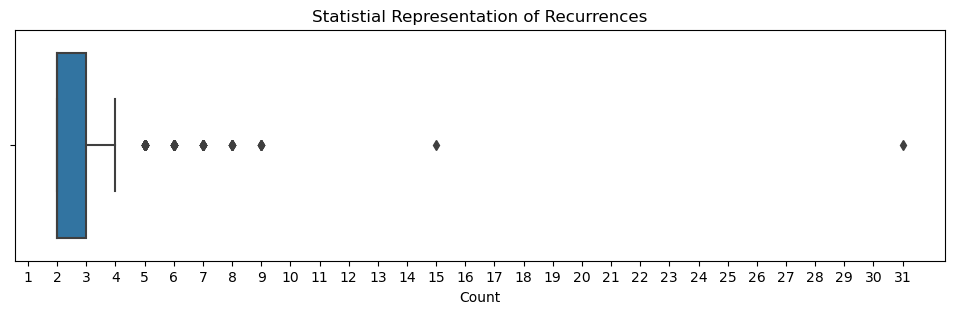

In [32]:
fig, ax = plt.subplots(figsize=(12,3))
#plt.figure()
sns.boxplot(data=freq, x='Count', ax=ax)
ax.set_xticks(np.arange(1, 32, 1))
plt.title('Statistial Representation of Recurrences')
plt.show()

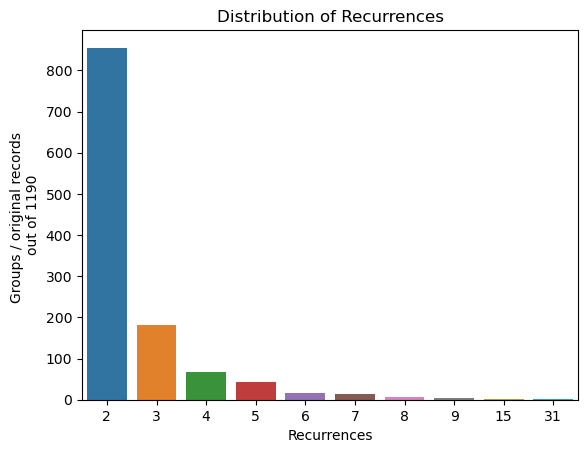

In [33]:
sns.countplot(data=freq, x='Count') #Sheikh Zayed
plt.xlabel('Recurrences')
plt.ylabel('Groups / original records \nout of 1190')
plt.title('Distribution of Recurrences')
plt.show()

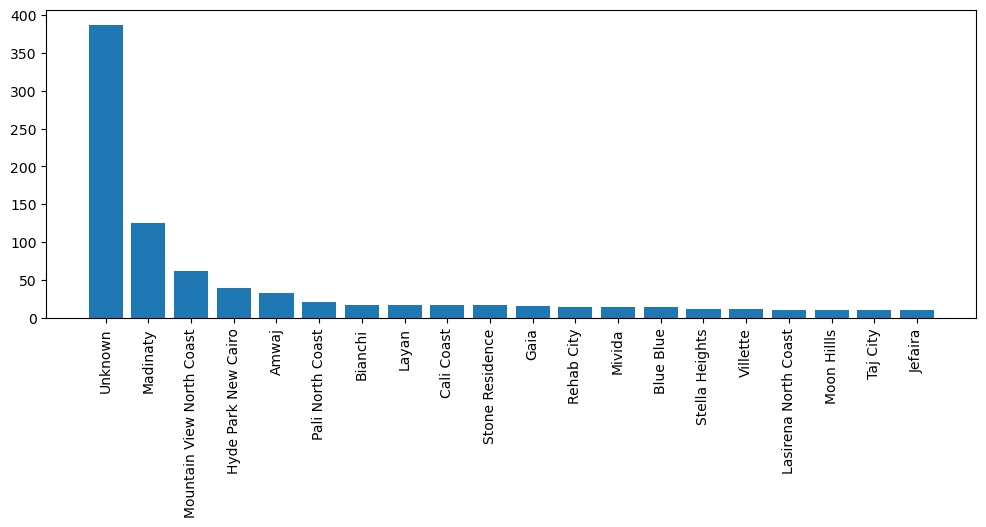

In [34]:
# Compounds of the duplicate records
plt.figure(figsize=(12,4))
cop = freq['Compound'].value_counts()[:20]
plt.bar(cop.index, cop.values)
plt.xticks(rotation=90)
plt.show()

## Insights:

- There are 3074 records showing duplication, 1190 of which are originals.
- Minimum duplication records show recurrence of 2 times (original included), also they comprise about 70% of the total originals.
- Maximum duplication records show recurrence of 31 and 15 times, with a single instance for each number.
- Statistical analysis using boxplot demonstrates the maximum allowed recurrence before it is considered an outlier to be **4 recurrences.**
- As the total recurrences of a record increases, it is more likely that the duplications are not authentic, and merely the result of data entry errors.

#### How should the duplicates be processed?

- Considering the nature of the subject dataset (real estate data), it's possible for different properties to have identical features and prices, especially in large apartment complexes i.e. Compounds and other residential areas.
- However, the boxplot analysis demonstrated the likelyhood of any recurrence bigger than 4 to be erroneous.
- So, the best solution to this problem is keeping all the duplicates having less than or equal to 4 recurrences. And cutting down all the records of recurrences bigger than 4 (outliers) to that same number. e.g. 31 records are sized down to 4.

## 4.3 Processing Duplicates

In [35]:
# Adding a cumulative count column to mark unwanted duplicates
df['cumulative'] = df.groupby(list(df.columns)).cumcount()
df.sort_values(by='cumulative', ascending=False).head(5)

Type     Price Bedrooms Bathrooms   Area Furnished Level Compound  \
5290  Apartment  500000.0      3.0       3.0  245.0   Unknown     3  Unknown   
5288  Apartment  500000.0      3.0       3.0  245.0   Unknown     3  Unknown   
5281  Apartment  500000.0      3.0       3.0  245.0   Unknown     3  Unknown   
5278  Apartment  500000.0      3.0       3.0  245.0   Unknown     3  Unknown   
5277  Apartment  500000.0      3.0       3.0  245.0   Unknown     3  Unknown   

           Payment_Option Delivery_Date  Delivery_Term          City  \
5290  Cash or Installment       Unknown  Semi Finished  Sheikh Zayed   
5288  Cash or Installment       Unknown  Semi Finished  Sheikh Zayed   
5281  Cash or Installment       Unknown  Semi Finished  Sheikh Zayed   
5278  Cash or Installment       Unknown  Semi Finished  Sheikh Zayed   
5277  Cash or Installment       Unknown  Semi Finished  Sheikh Zayed   

      cumulative  
5290          30  
5288          29  
5281          28  
5278          27  
5277          26

In [36]:
# How many records are expected to be dropped?
excess_records = df.loc[df['cumulative']>3, 'cumulative'].count() # cumulative count starts from index [0]
print(excess_records)

206


In [37]:
# Filtering the DataFrame to keep only the desired number of occurrences and dropping the temporary column
df = df[df['cumulative'] < 4]
df = df.drop(columns='cumulative')
df

Type       Price Bedrooms Bathrooms   Area Furnished  \
0                Duplex   4000000.0      3.0       3.0  400.0        No   
1             Apartment   4000000.0      3.0       3.0  160.0        No   
2             Apartment   2250000.0      3.0       2.0  165.0        No   
3             Apartment   1900000.0      3.0       2.0  230.0        No   
4             Apartment   5800000.0      2.0       3.0  160.0        No   
...                 ...         ...      ...       ...    ...       ...   
27355  Standalone Villa   4800000.0      4.0       3.0  165.0   Unknown   
27356        Town House    890000.0      3.0       2.0  240.0   Unknown   
27357        Town House   4000000.0      4.0       3.0  218.0   Unknown   
27358        Twin House  13800000.0      3.0       4.0  308.0        No   
27359  Standalone Villa  35000000.0      4.0       4.0  478.0   Unknown   

         Level             Compound       Payment_Option  Delivery_Date  \
0            7              Unknown                 Cash  Ready to move   
1          10+              Unknown                 Cash  Ready to move   
2            1              Unknown                 Cash  Ready to move   
3           10              Unknown                 Cash  Ready to move   
4       Ground              Eastown                 Cash  Ready to move   
...        ...                  ...                  ...            ...   
27355  Unknown              Unknown  Cash or Installment        Unknown   
27356  Unknown              Unknown      Unknown Payment        Unknown   
27357  Unknown              Unknown  Cash or Installment        Unknown   
27358  Unknown  Cairo Festival City                 Cash  Ready to move   
27359  Unknown              Unknown      Unknown Payment        Unknown   

       Delivery_Term                    City  
0           Finished               Nasr City  
1           Finished             Camp Caesar  
2           Finished                   Smoha  
3           Finished               Nasr City  
4      Semi Finished  New Cairo - El Tagamoa  
...              ...                     ...  
27355  Semi Finished  New Cairo - El Tagamoa  
27356       Unknown              North Coast  
27357       Finished  New Cairo - El Tagamoa  
27358  Semi Finished  New Cairo - El Tagamoa  
27359       Finished                Mokattam  

[26487 rows x 12 columns]

## 4.4 Visual representation of the new duplication subset

In [38]:
# Creating a dataframe consisting of the new modified duplicates.
neo_dup = df.loc[df.duplicated(keep=False)]

# Grouping by unique records and sizing each group
sz = neo_dup.groupby(list(neo_dup.columns)).size().reset_index(name='Count')

# sorting 
frequency = sz.sort_values(by='Count', ascending=False)

# keep=False implies that original records are included.

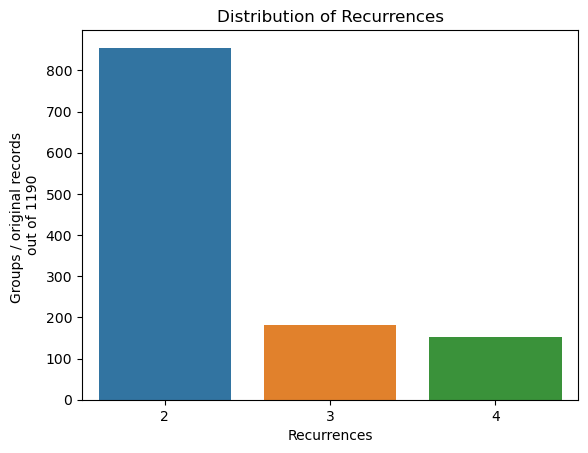

In [39]:
sns.countplot(data=frequency, x='Count')
plt.xlabel('Recurrences')
plt.ylabel('Groups / original records \nout of 1190')
plt.title('Distribution of Recurrences')
plt.show()

In [40]:
frequency.Count.describe()

count    1190.000000
mean        2.410084
std         0.706737
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: Count, dtype: float64

# 5.0 Checking for other Inconsistencies

- Categorical Inconsistencies might emerge between correlated columns like **Compound** and **City**, for instance, some Compounds are known to be within specific regions, yet associated with others.
- A logical inconsistency emerges as, for instance, a misfit presents in the intuitive relationship between two attributes. like the **Area** of the property and how many compartments might fit inside of it e.g. **Bedrooms** and **Bathrooms.**
- Spotting inconsistencies implies making manual observations onto a sample subset of the data.

### 5.0.1 Choosing a sample dataset

- Sample dataset where 'Type'=='Studio'

In [41]:
df.loc[df['Type']=='Studio'].sort_values(by='Price', ascending=False).head()

Type      Price Bedrooms Bathrooms  Area Furnished   Level  \
11913  Studio  6500000.0      1.0       1.0  40.0       Yes  Ground   
17154  Studio  6200000.0      1.0       1.0  77.0        No       2   
15583  Studio  6150000.0      2.0       1.0  74.0       Yes       3   
17897  Studio  6000000.0      1.0       1.0  90.0       Yes       2   
17723  Studio  5650000.0      1.0       1.0  70.0       Yes       3   

             Compound Payment_Option  Delivery_Date Delivery_Term  \
11913  Hacienda White           Cash        Unknown      Finished   
17154         Marassi           Cash  Ready to move      Finished   
15583         Unknown           Cash  Ready to move      Unknown    
17897         Marassi           Cash  Ready to move      Finished   
17723         Marassi           Cash  Ready to move      Finished   

                         City  
11913             North Coast  
17154             North Coast  
15583             North Coast  
17897  New Cairo - El Tagamoa  
17723  New Cairo - El Tagamoa

> [Note!]
> it's well known that Compound Marassi is in the North Coast, yet some records above inaccurately associate it with different cities.

In [42]:
# NNC = Non North Coast

# all records where Compound == Marassi
all_mar = df.loc[(df['Compound']=='Marassi')]

# all cities associated with Marassi
mar_city = all_mar.City.value_counts()

print(f'Marassi associated Cities: \n\n{mar_city}')

Marassi associated Cities: 

North Coast               335
New Cairo - El Tagamoa     17
Marsa Matrouh               9
Alamein                     3
Name: City, dtype: int64


In [43]:
p = round((17+9+3)*100/(17+9+3+335), 2)
print(f'Percentage of mismatching records between "City" and "Compound" in Marassi subframe: {p} %')

Percentage of mismatching records between "City" and "Compound" in Marassi subframe: 7.97 %


## Q. Do other compound-subsets show the same partial misfits? if so, Which column is showing the correct values? 

- Theory: Columns 'Compound' and 'City' partially show logical mismatches for compound-filtered subsets (8% in data above), which one is incorrect?
- Statistical approach is needed

In [44]:
# Top 10 Compounds by frequency

top10cpd = df.Compound.value_counts().reset_index(name='Size').head(10)
top10cpd.columns = ['Compound', 'Size']
top10cpd

Compound   Size
0                    Unknown  10609
1                   Madinaty   1254
2  Mountain View North Coast    822
3        Hyde Park New Cairo    497
4                 Rehab City    420
5                      Amwaj    378
6        Mountain View iCity    365
7                    Marassi    364
8                     Mivida    314
9            Not in Compound    286

In [45]:
# test to determine the accuracy of associations between columns 'Compound' and 'City'

def cpd_associated_cities(compound):
    comp_frame = df[df['Compound']==f'{compound}']
    cit_size = comp_frame.City.value_counts()
    return cit_size

In [46]:
cpd_associated_cities('Madinaty')

Madinaty                  1190
New Cairo - El Tagamoa      47
Rehab City                  14
Heliopolis                   1
Gouna                        1
New Capital City             1
Name: City, dtype: int64

In [47]:
cpd_associated_cities('Mountain View North Coast')

North Coast               756
Sheikh Zayed               22
New Cairo - El Tagamoa     19
Nasr City                   5
Alamein                     5
Dabaa                       3
Agami                       2
Marsa Matrouh               2
Ain Sukhna                  2
Heliopolis                  1
Hadayek 6th of October      1
Smoha                       1
6th of October              1
Maadi                       1
Downtown Cairo              1
Name: City, dtype: int64

In [48]:
cpd_associated_cities('Hyde Park New Cairo')

New Cairo - El Tagamoa    483
Rehab City                 13
(View phone number)         1
Name: City, dtype: int64

In [49]:
cpd_associated_cities('Rehab City')

Rehab City                408
New Cairo - El Tagamoa      9
Madinaty                    2
Nasr City                   1
Name: City, dtype: int64

In [50]:
cpd_associated_cities('Maadi V')

Zahraa Al Maadi    8
Maadi              5
Shorouk City       1
Name: City, dtype: int64

> [NOTE!] 
>  For each compound, the city highest in numbers turn out to be the correct association for that compound.

## 5.1 Investigating Column-to-Column compatibility

### 5.1.1 Is 'Price' more consistent with 'Compound' or 'City' in filtered subsets?

- Proceeding with Compound == Marassi subset.
- Fixing the factor 'Compound' to measure consistency between 'Price' and 'City'.

In [51]:
# Price comparison - pivot table
pivot00 = pd.pivot_table(all_mar, index=['Type', 'City'],  columns='Furnished', values=['Price'], aggfunc=['mean', 'count'])


def highlight_cells(val):
     # highlighting single porperties - no true mean
    if val == 1:
        color = 'wheat'
    # mean prices
    elif val > 1.1*10**7 and val < 2*10**7:     # 11 mil to 20 mill
        color = 'yellow'
    elif val > 2*10**7 and val < 3.5*10**7:     # 20 mil to 35 mil
        color = 'lime'
    elif val >= 5*10**6 and val < 9*10**6:     # 5 mil to 9 mil
        color = 'cyan'
    elif val > 3*10**6 and val < 5*10**6:     # 3 mil to 5 mil
        color = 'salmon'
    else:
        color = ''
    return f'background-color: {color}'

styled_pivot = pivot00.style.applymap(highlight_cells)

display(styled_pivot)
print('DATA: All Marassi Records (same compound)')

DATA: All Marassi Records (same compound)


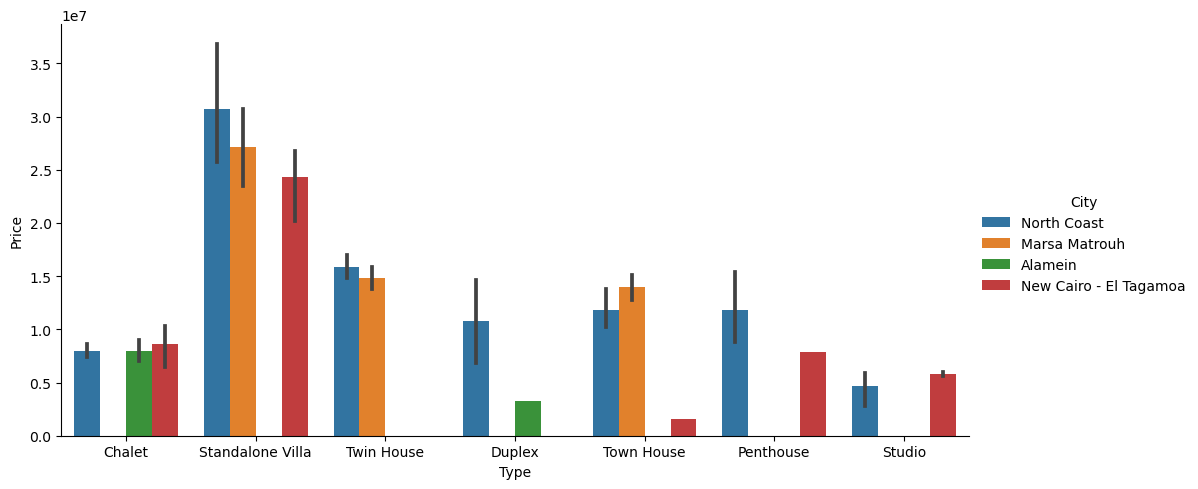

In [52]:
# Visual representation of the insights drawn from the pivot table _ (convergent Price ranges)
sns.catplot(data=all_mar, x='Type', y='Price', hue='City', kind='bar', aspect=2)
plt.show()

In [53]:
# Average Price for each Type of property _ whole data

display(Markdown('### Average price for each Type of property _ whole data'))
for arc_type in df.Type.unique():
    tyframe = df.loc[df['Type']== arc_type]
    mean_price = tyframe.Price.mean()
    print(f'Type: {arc_type}\n Mean: {mean_price}\n')


### Average price for each Type of property _ whole data

Type: Duplex
 Mean: 3327199.3778040144

Type: Apartment
 Mean: 1993594.2603795966

Type: Penthouse
 Mean: 3631069.9238095237

Type: Studio
 Mean: 1337617.75

Type: Chalet
 Mean: 2320906.8728943337

Type: Standalone Villa
 Mean: 10723368.259444203

Type: Twin House
 Mean: 6807832.687279152

Type: Town House
 Mean: 4878097.36862874



In [54]:
# demonstrating that varying areas do account for the spread-out prices

mar_pent = df.loc[(df['Type']=='Penthouse') & (df['Compound']=='Marassi'), ['Price', 'Area', 'City', 'Furnished']].sort_values(by='Area', ascending=False)
display(Markdown('### All marassi penthouses'))
display(mar_pent)

### All marassi penthouses

Price   Area                    City Furnished
12570  25000000.0  356.0             North Coast        No
11828  19500000.0  337.0             North Coast        No
15116  23000000.0  335.0             North Coast   Unknown
14622   9800000.0  315.0             North Coast       Yes
9983    9500000.0  231.0             North Coast       Yes
17104  10300000.0  231.0             North Coast   Unknown
11874   7495960.0  208.0             North Coast   Unknown
17769   7900000.0  200.0  New Cairo - El Tagamoa       Yes
13589   8000000.0  194.0             North Coast       Yes
17287   9800000.0  190.0             North Coast   Unknown
16357   8000000.0  184.0             North Coast       Yes
14612   7790000.0  183.0             North Coast   Unknown
16356   8000000.0  183.0             North Coast       Yes
15145   7900000.0  150.0             North Coast   Unknown

In [55]:
# All Apartments of the North coast
north_apt = df.loc[(df['City']=='North Coast') & (df['Type']=='Apartment')]
north_apt_cpd = north_apt.Compound.value_counts()
north_apt_cpd

Unknown                19
Sun Capital             2
Mountain View 3         2
Celia                   1
Mountain View iCity     1
2020 Compound           1
Sarai                   1
Name: Compound, dtype: int64

## Insights:
- All Apartments of the North coast are very few (27 out of 4000+ records) and are associated with compounds that are not in the North Coast (or any coast), this consistency that combines **Type** and **Compound** and excludes **City** out suggests that column **City** is incorrect.

- All "Marassi" records do not have properties of Type "Apartment", which is reasonable because "Chalet" category encompasses all beach / coastal apartments, and "Marassi" is in the "North Coast".

- within each type of property, there is a convergence in **Price** between "Marassi" properties of different areas, also there is an increase above whole-data mean prices specific for each type.
 
- large differences in prices per type and between different cities are scarse and could be explained by gaps in properties' **Area,** a factor not considered in the pivot table. (Check the table above)
 
 ### Conclusion:
 - Column "Compound" is showing high compatiblity with **Type** and **Price.**
 - incorrectness should likely be ascribed to the column "City", for being incoherent with **Type** and **Price.**

### 5.1.2 Price range comparison between NC and NNC Marassi records when limiting the factor 'Type' to Standalone Villas only

In [56]:
# all marassi villas
marvill = df.loc[(df['Type']=='Standalone Villa') & (df['Compound']=='Marassi'), ['Price', 'Area', 'City']]

# associated cities
city_vill = marvill.City.value_counts()
city_vill

North Coast               29
New Cairo - El Tagamoa     6
Marsa Matrouh              2
Name: City, dtype: int64

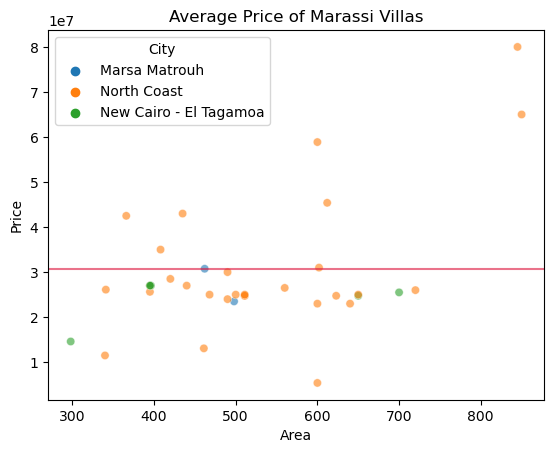

In [57]:
# marassi villas _ North Coast
marvill_nc =  marvill.loc[marvill['City']=='North Coast']

# scatter plot _ all marassi villas
sns.scatterplot(data=marvill, x='Area', y='Price', hue='City', alpha=0.6, sizes=90)

# mean price of marassi villas _ North Coast only
meanprice = marvill_nc.Price.mean()

plt.axhline(meanprice, color='crimson', alpha=0.6, label='Average Price')
plt.title('Average Price of Marassi Villas')
plt.show()

In [58]:
# Price stats of marassi villas _ North Coast
marvill_nc.Price.describe()

count    2.900000e+01
mean     3.074923e+07
std      1.554240e+07
min      5.400000e+06
25%      2.475000e+07
50%      2.600000e+07
75%      3.100000e+07
max      8.000000e+07
Name: Price, dtype: float64

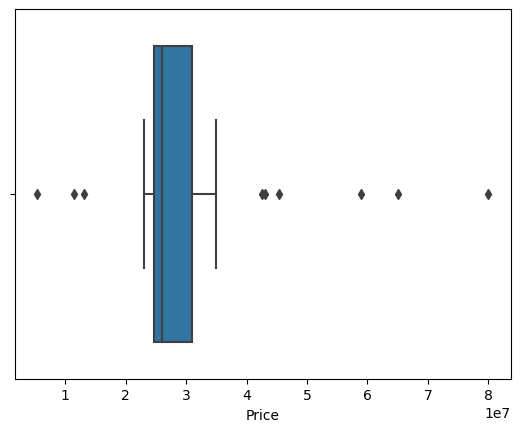

In [59]:
sns.boxplot(data=marvill_nc, x='Price' )
plt.show()

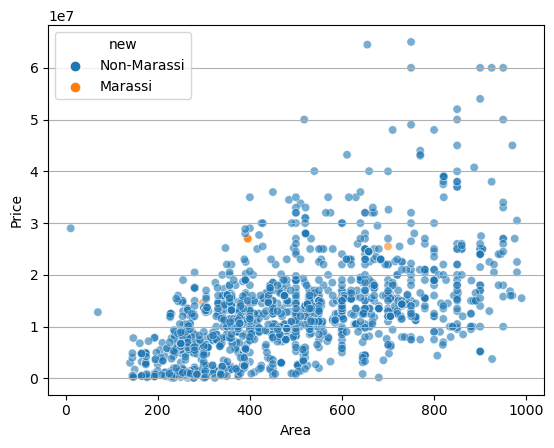

In [60]:
# all Tagamoa villas
tagavill = df.loc[(df['Type']=='Standalone Villa') & (df['City']=='New Cairo - El Tagamoa'), ['Price', 'Area', 'Compound']]
tagavill['new'] = tagavill['Compound'].apply(lambda x: 'Marassi' if x == 'Marassi' else 'Non-Marassi')

sns.scatterplot(data=tagavill, x='Area', y='Price', hue='new', alpha=0.6, sizes=90)
plt.grid(axis='y')
plt.show()

In [61]:
px.box(tagavill, x='Price')

## Insights:

- with an exception of a single record (of extremely low area), all prices of NNC Marassi Villas lie within the bulk \ normal range of North Coast Marassi Villas, this observation suggests that the attribute **City** of NNC Marassi villas was not assigned correctly. 


 ### Conclusion:
 - Column "Compound" is showing high compatiblity with **Price.**
 - This suggests that the column that's most likely showing wrong values is **City**

### 5.1.3 Is 'Level' more consistent with 'Compound' or 'City' ?
- Does **Level** has any natural or logical correlations with other columns?
    1. certain compounds might have opted to construct it's multi-story architecture based on schemes of definite story limits.
    2. certain types of architecture are associated with specific story sets, e.g. Standalone Villas having ground and 1st levels.

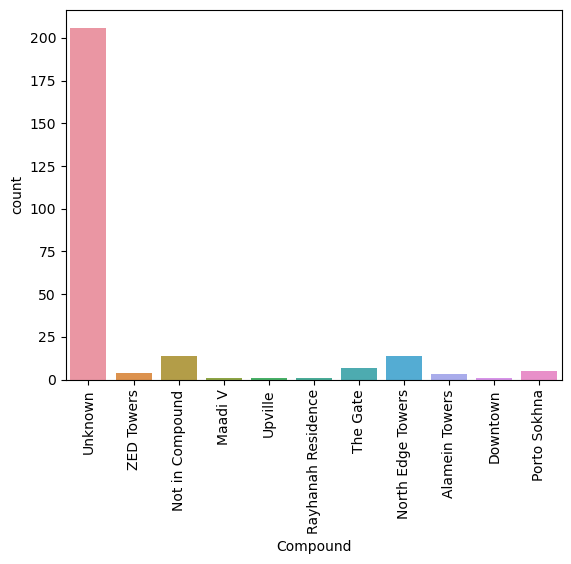

In [62]:
# Level-to-Compound consistency when Level == 10+
# All compounds where Level == 10+
lev11 = df.loc[df['Level']=='10+']
sns.countplot(data=lev11, x='Compound')
plt.xticks(rotation=90)
plt.show()

> [Note!]
> The following Compounds do not have buildings that surpass 10 floors, which shows that column 'Level' might not be 100% accurate: {Maadi V, Upville, Rayhanah}

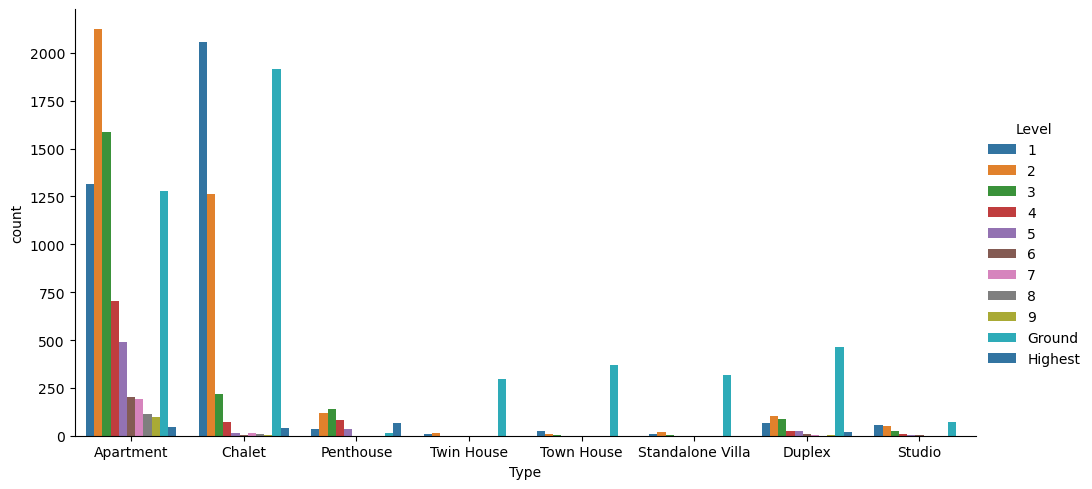

In [63]:
# Levels per Type of architecture
# Visual representation _ whole data
sns.catplot(data=df[~df['Level'].isin(['Unknown', '10', '10+'])].sort_values(by='Level'), x='Type', hue='Level', kind='count', aspect=2, palette='tab10')
plt.show()

In [64]:
df[(df['Type']=='Standalone Villa') & (df['Level'].isin(['3']))]

Type      Price Bedrooms Bathrooms   Area Furnished Level  \
11462  Standalone Villa  1750000.0      4.0       3.0  160.0        No     3   
16708  Standalone Villa  2205000.0      5.0       5.0  250.0   Unknown     3   
16714  Standalone Villa  4500000.0      9.0       3.0  500.0       Yes     3   

         Compound       Payment_Option  Delivery_Date Delivery_Term  \
11462  Palm Beach                 Cash  Ready to move  Not Finished   
16708     Unknown  Cash or Installment  Ready to move      Finished   
16714       Lotus                 Cash  Ready to move      Finished   

              City  
11462     Ras Sedr  
16708  North Coast  
16714   West Somid

## Insights:
- Ambiguous Observations:
    - Are the mentioned Standalone Villas located at the third floor or are they made up of 3 stories? (same for 2nd floor)
    - Same question for Twin Houses, do the numbers represent the location of the property or the levels it is made up of?
    - How could there be Penthouses at Ground floor?
### conclusion:
- Column **Level** is unreliable and most likely not 100% accurate.

In [65]:
top10cpd

Compound   Size
0                    Unknown  10609
1                   Madinaty   1254
2  Mountain View North Coast    822
3        Hyde Park New Cairo    497
4                 Rehab City    420
5                      Amwaj    378
6        Mountain View iCity    365
7                    Marassi    364
8                     Mivida    314
9            Not in Compound    286

In [66]:
# defined function to show Level distribution by Compound
def compound_levels(compound):
    comframe = df[df['Compound']==f'{compound}']
    lev_cnt = comframe.Level.value_counts()
    return lev_cnt

compound_levels('Marassi')

Unknown    125
Ground      91
2           58
1           52
3           23
4           14
Highest      1
Name: Level, dtype: int64

In [67]:
compound_levels('Madinaty')

Unknown    616
1          126
Ground     122
5          110
4           90
3           86
2           71
6           33
Name: Level, dtype: int64

In [68]:
compound_levels('Maadi V')

2          5
Ground     4
3          3
10+        1
Unknown    1
Name: Level, dtype: int64

In [69]:
compound_levels('Mountain View North Coast')

Ground     371
1          226
2          114
Unknown     92
3            9
4            6
Highest      4
Name: Level, dtype: int64

In [70]:
compound_levels('Rehab City')

Unknown    236
Ground      55
3           43
4           29
1           25
2           16
5           15
7            1
Name: Level, dtype: int64

## Q. what should the correct associations between "Compound" and "City" look like?

In [71]:
# DataFrame of cities and their counts before "City" reassignment
c = df.City.value_counts().reset_index()
c.columns = ['city', 'counts']
c

city  counts
0    New Cairo - El Tagamoa    6501
1               North Coast    6271
2              Sheikh Zayed    2249
3            6th of October    1694
4                Ain Sukhna    1685
..                      ...     ...
173           New Beni Suef       1
174          Kafr al-Dawwar       1
175                  Khanka       1
176                  Quesna       1
177              Abu Rawash       1

[178 rows x 2 columns]

In [72]:
# Prevalence-Based 1:1 associations between compounds and cities _ preview

all_cpd = sorted(df.Compound.unique())
for cpd in all_cpd:
    cframe = df[df['Compound']==cpd]
    city_cnt = cframe.City.value_counts().reset_index(name='Counts')
    hi_city = city_cnt.loc[city_cnt['Counts'].idxmax(), 'index']
    length = 28 - len(cpd)
    spaces = '.' * length
    print(f'The Compound: {cpd} {spaces} City: {hi_city}')
    

The Compound: 2020 Compound ............... City: New Capital City
The Compound: 90 Avenue ................... City: New Cairo - El Tagamoa
The Compound: ABHA ........................ City: Sheikh Zayed
The Compound: AZAD ........................ City: New Cairo - El Tagamoa
The Compound: Abu Al-Hool ................. City: Hadayek al-Ahram
The Compound: Aeon ........................ City: 6th of October
The Compound: Aghadir ..................... City: North Coast
The Compound: Agora ....................... City: North Coast
The Compound: Aida Beach .................. City: North Coast
The Compound: Al Burouj ................... City: Shorouk City
The Compound: Al Diyar .................... City: New Cairo - El Tagamoa
The Compound: Al Hayah .................... City: New Cairo - El Tagamoa
The Compound: Al Hegaz .................... City: Ain Sukhna
The Compound: Al Maamourah El Gadida ...... City: North Coast
The Compound: Al Maqsad ................... City: New Capital City
The Com

The Compound: Etlalah ..................... City: 6th of October
The Compound: Etoile de Ville ............. City: New Cairo - El Tagamoa
The Compound: Fanadir Bay ................. City: Gouna
The Compound: Fanar De Luna ............... City: Ain Sukhna
The Compound: Farah ....................... City: North Coast
The Compound: Fifth Square ................ City: New Cairo - El Tagamoa
The Compound: Fleur De Ville .............. City: New Cairo - El Tagamoa
The Compound: Florenta .................... City: Katameya
The Compound: Floria ...................... City: New Capital City
The Compound: Flowers Park ................ City: New Cairo - El Tagamoa
The Compound: Forty West - Sodic .......... City: Sheikh Zayed
The Compound: Fouka Bay ................... City: North Coast
The Compound: Fountain Park ............... City: New Cairo - El Tagamoa
The Compound: Future Gate ................. City: New Cairo - El Tagamoa
The Compound: GCR Golf City ............... City: Zagazig
The Compo

The Compound: Marassi ..................... City: North Coast
The Compound: Marbella .................... City: North Coast
The Compound: Marina 1 .................... City: North Coast
The Compound: Marina 2 .................... City: North Coast
The Compound: Marina 4 .................... City: North Coast
The Compound: Marina 5 .................... City: North Coast
The Compound: Marina 6 .................... City: North Coast
The Compound: Marina 7 .................... City: North Coast
The Compound: Marina City ................. City: New Cairo - El Tagamoa
The Compound: Marina Flowers .............. City: Hammam
The Compound: Marina Gardens .............. City: North Coast
The Compound: Marina Sunshine ............. City: North Coast
The Compound: Marina Wadi Degla ........... City: Ain Sukhna
The Compound: Marseilia Beach 1 ........... City: North Coast
The Compound: Marseilia Beach 2 ........... City: North Coast
The Compound: Marseilia Beach 3 ........... City: North Coast
The

The Compound: The Address East ............ City: New Cairo - El Tagamoa
The Compound: The Axis .................... City: Sheikh Zayed
The Compound: The Brooks .................. City: New Cairo - El Tagamoa
The Compound: The Capital Way ............. City: New Capital City
The Compound: The City .................... City: New Capital City
The Compound: The Crown ................... City: Sheikh Zayed
The Compound: The Estates ................. City: Sheikh Zayed
The Compound: The Gate .................... City: Alamein
The Compound: The Groove .................. City: Ain Sukhna
The Compound: The Icon Residence .......... City: New Cairo - El Tagamoa
The Compound: The Key ..................... City: Mokattam
The Compound: The MarQ .................... City: New Cairo - El Tagamoa
The Compound: The Pearl ................... City: New Mansoura
The Compound: The Square .................. City: New Cairo - El Tagamoa
The Compound: The Village ................. City: New Cairo - El Tagamo

In [73]:
# list of compounds that represent 3 or less records
lo_res = df.Compound.value_counts().reset_index(name='num')
cpd_list = lo_res[lo_res['num']==3]['index'].to_list() 

cpd_frame = df.loc[df['Compound'].isin(cpd_list), ['Compound', 'City']].sort_values(by='Compound')
print(cpd_frame.count())
print(cpd_frame[50:])

Compound    96
City        96
dtype: int64
                      Compound                    City
12122               La Vista 4              Ain Sukhna
24140            Leena Springs  New Cairo - El Tagamoa
23501            Leena Springs  New Cairo - El Tagamoa
23084            Leena Springs  New Cairo - El Tagamoa
4272          Maadi Grand City                   Maadi
5450          Maadi Grand City         Zahraa Al Maadi
9022          Maadi Grand City  New Cairo - El Tagamoa
14898                  Maraqia            Borg al-Arab
10521                  Maraqia             North Coast
10081                  Maraqia                   Haram
16461                 Marbella             North Coast
17294                 Marbella                   Ataba
13175                 Marbella             North Coast
3272                 Moon City           Ismailia City
7739                 Moon City              Salam City
3284                 Moon City           Ismailia City
20285                N

- the following list is of 3-record compounds that may still show inaccurate associations after city reassignment, because each record is represented by a different city, i.e. non of which is prevalent (1/3 for all)
- List: [Cleopatra Square:6th, El Reef El Orouby:6th, Jewar:6th, Maadi Grand City, Maraqia:nc, Noor City:New Capital, Remas:nc, Alex West, Degla Towers, Tala]

## 5.2 City Re-assignment
- After concluding that **City** is partially incorrect, the column will be reassigned to accommodate for the column **Compound** which presented higher consistency with other columns.
- Each compound will be represented by a single authentic city.
- Reassignment is prevalence-based.
- Method: for each compound, all associated cities will be sized, and the highest-ranking will replace the other cities. 

In [74]:
# Prevalence-Based Top associations between compounds and cities

all_cpd = sorted([x for x in df.Compound.unique() if x!='Unknown'])
for cpd in all_cpd:
    cframe = df[df['Compound']==cpd]
    city_cnt = cframe.City.value_counts().reset_index(name='Counts')
    hi_city = city_cnt.loc[city_cnt['Counts'].idxmax(), 'index']
    df.loc[df['Compound']==cpd, 'City'] = hi_city


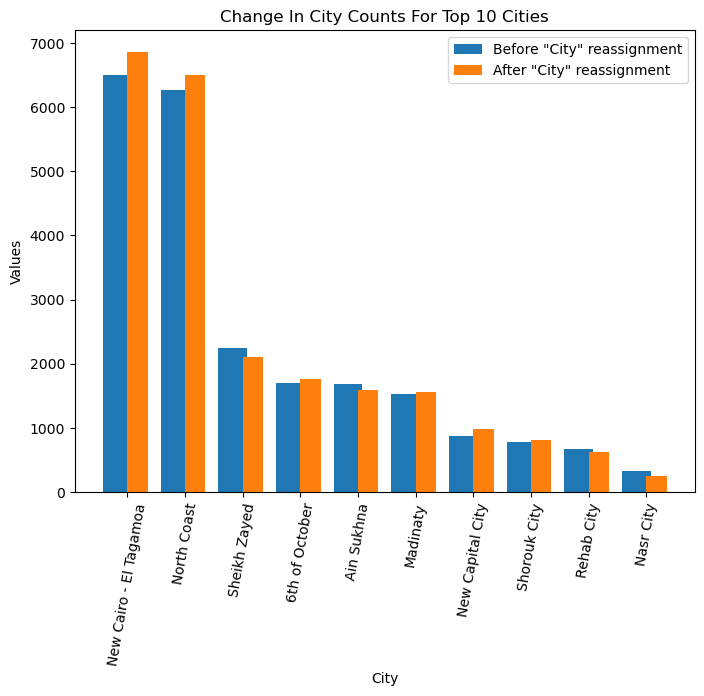

In [75]:
# Change In City Counts For Top 10 Cities [by counts]

# DataFrame of cities and their counts after "City" reassignment
cn = df.City.value_counts().reset_index()
cn.columns = ['city', 'counts']


plt.figure(figsize=(8, 6))
x = range(10)

# Plotting old and new bars side-by-side
plt.bar(x, c['counts'][:10], width=0.5, label='Before "City" reassignment', align='center')
plt.bar([p + 0.35 for p in x], cn['counts'][:10], width=0.35, label='After "City" reassignment', align='center')

# Setting labels and title
plt.xticks([p + 0.35 / 2 for p in x], c['city'][:10], rotation=80)
plt.xlabel('City')
plt.ylabel('Values')
plt.title('Change In City Counts For Top 10 Cities')
plt.legend()

plt.show()

In [76]:
# is it true that North coast Chalet buildings do not exceed 4 stories?
above = df[(df['City']=='North Coast') & (df['Level'].isin(['5', '6', '7', '9', '8', '10', '10+']))].Compound.value_counts()
above

Unknown              22
Porto Golf Marina    11
Golf Porto Marina    11
Alamein Towers        4
Rittal Vieux          2
Bianchi               1
Almaza Bay            1
Name: Compound, dtype: int64

# 6.0 Investigation

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26487 entries, 0 to 27359
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            26487 non-null  object 
 1   Price           26487 non-null  float64
 2   Bedrooms        26487 non-null  object 
 3   Bathrooms       26487 non-null  object 
 4   Area            26487 non-null  float64
 5   Furnished       26487 non-null  object 
 6   Level           26487 non-null  object 
 7   Compound        26487 non-null  object 
 8   Payment_Option  26487 non-null  object 
 9   Delivery_Date   26487 non-null  object 
 10  Delivery_Term   26487 non-null  object 
 11  City            26487 non-null  object 
dtypes: float64(2), object(10)
memory usage: 2.6+ MB


In [78]:
df.describe(include='object')

Type Bedrooms Bathrooms Furnished    Level Compound  \
count       26487    26487     26487     26487    26487    26487   
unique          8       11        11         3       14      555   
top     Apartment      3.0       2.0        No  Unknown  Unknown   
freq         8430    11669      9116     16049     9744    10609   

             Payment_Option  Delivery_Date Delivery_Term  \
count                 26487          26487         26487   
unique                    4             10             5   
top     Cash or Installment  Ready to move      Finished   
freq                  10615          11672         13991   

                          City  
count                    26487  
unique                     170  
top     New Cairo - El Tagamoa  
freq                      6857

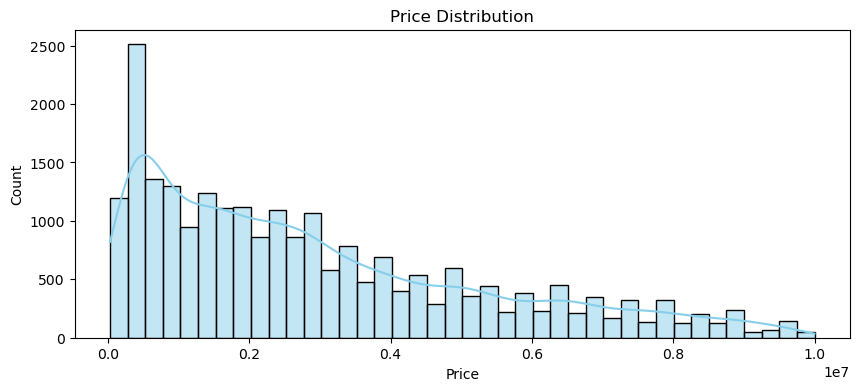

In [79]:
plt.figure(figsize=(10,4))
sns.histplot(df.loc[df['Price']<10000000, 'Price'], bins=40, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.show()

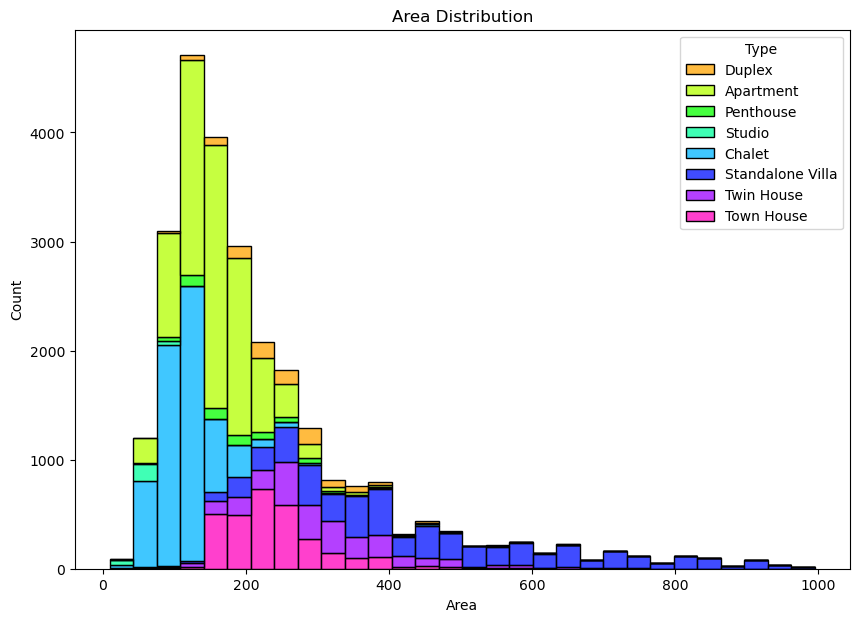

In [80]:
plt.figure(figsize=(10,7))
sns.histplot(data=df, x='Area', kde=False, bins=30, hue='Type', palette='hsv', multiple='stack')
plt.title('Area Distribution')
plt.show()

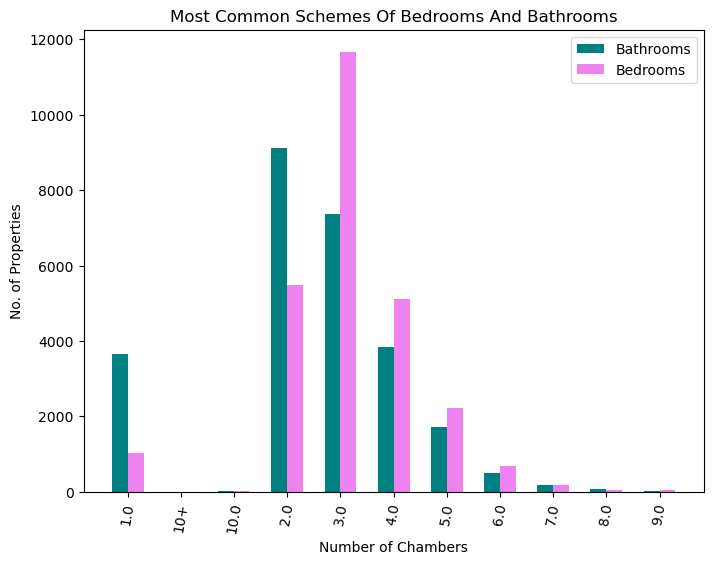

In [81]:
# most common schemes of bedrooms and bathrooms

# numbers of categories had to be extracted before plotting
bed = df.Bedrooms.value_counts().reset_index()
bed.columns = ['bedrooms', 'counts']
bath = df.Bathrooms.value_counts().reset_index()
bath.columns = ['bathrooms', 'counts']
bed = bed.sort_values(by='bedrooms')
bath = bath.sort_values(by='bathrooms')

plt.figure(figsize=(8, 6))
w = 0.3
r = range(len(df.Bedrooms.unique()))

# two plots
plt.bar(r, bath['counts'], width=w, align='center', label='Bathrooms', color='teal')
plt.bar([p + w for p in r], bed['counts'], width=w, align='center', label='Bedrooms', color='violet')

plt.xticks([p + w / 2 for p in r], bed['bedrooms'], rotation=80)
plt.legend()
plt.xlabel('Number of Chambers')
plt.ylabel('No. of Properties')
plt.title('most common schemes of bedrooms and bathrooms'.title())
plt.show()

## 6.1 Investigating the Dependency of Price on property's Area Per Type of Architecture

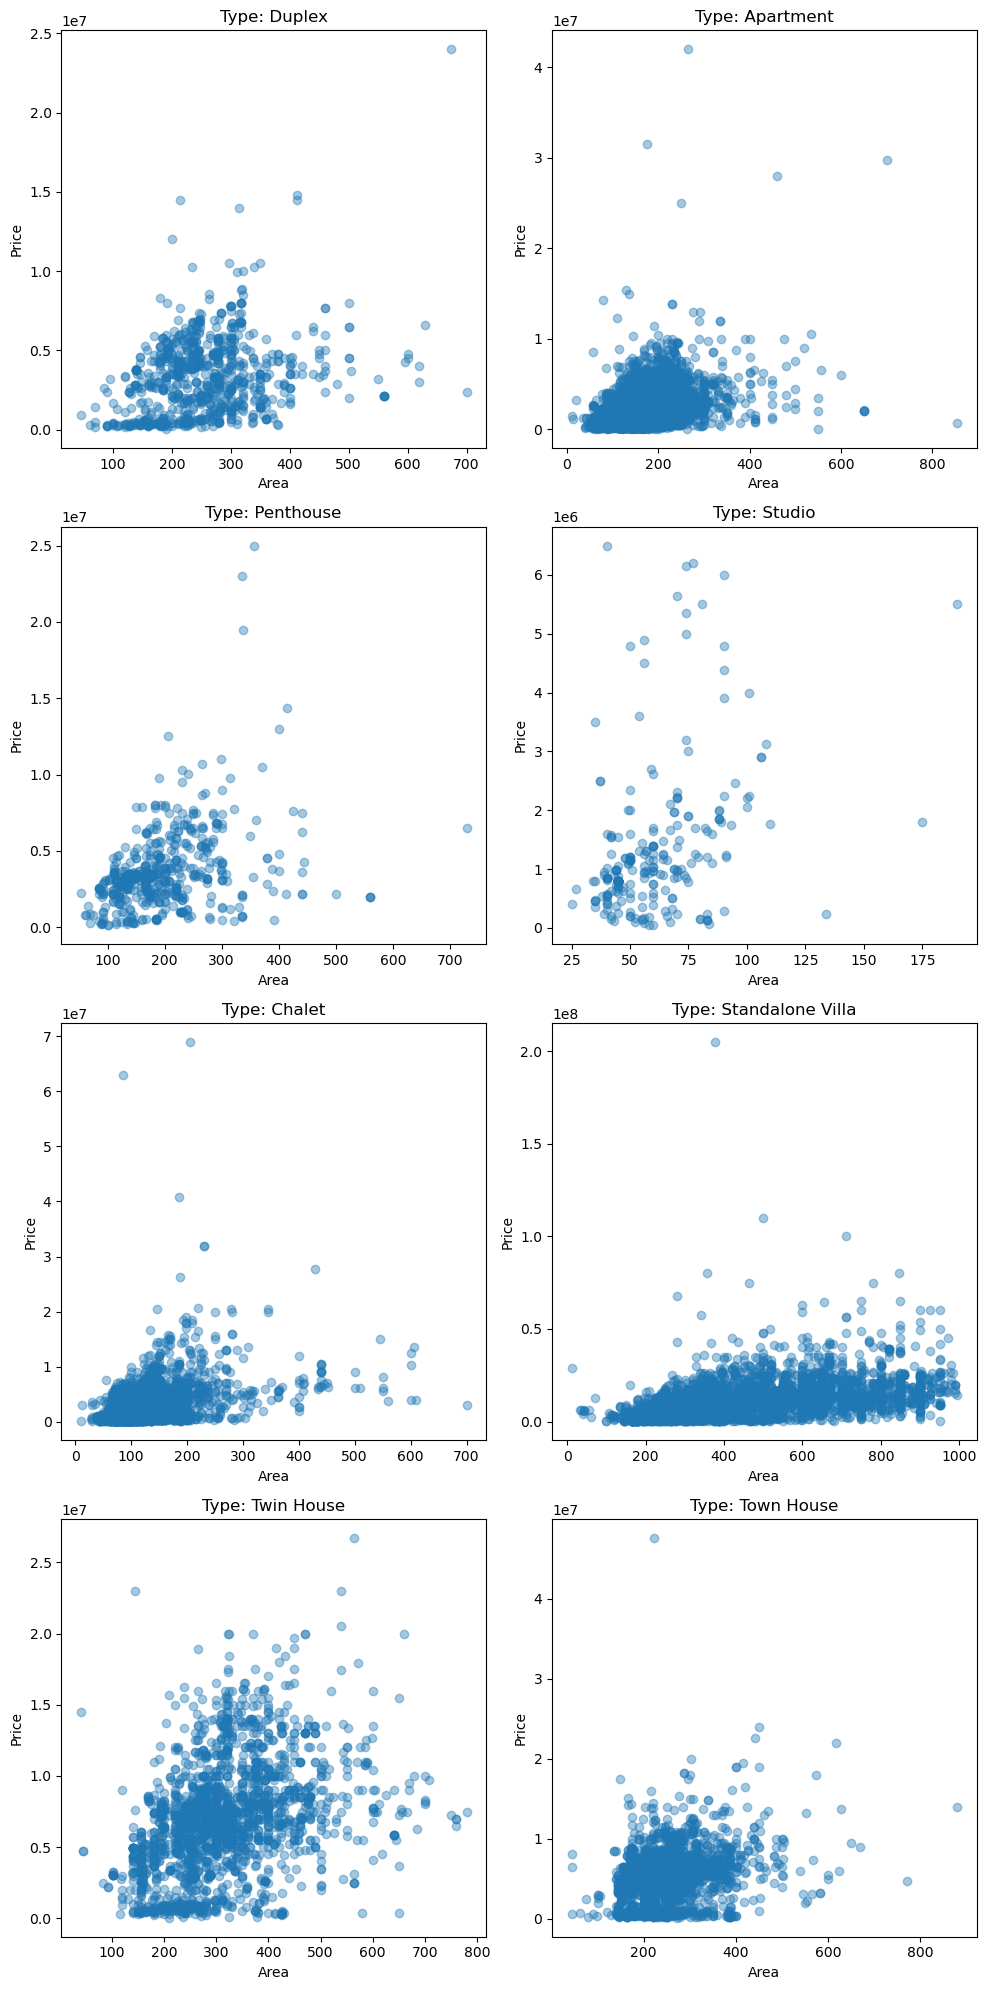

In [82]:
# Get unique categories
categories = df['Type'].unique()

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.flatten()

# Iterate through categories and create scatter plots
for ax, cat in zip(axes, categories):       #>>> for each ax in axes, and cat in categories.
    subset = df[df['Type'] == cat]
    ax.scatter(subset['Area'], subset['Price'], alpha=0.4)
    ax.set_title(f'Type: {cat}')
    ax.set_xlabel('Area')
    ax.set_ylabel('Price')

plt.tight_layout()
plt.show()

In [83]:
# correlation between Area and Price overall
correlation_matrix = df[['Price', 'Area']].corr('pearson')
display(correlation_matrix)
correlation_coefficient = df['Area'].corr(df['Price'])
print(f'Overall correlation_coefficient: {correlation_coefficient: .2f}')

Price      Area
Price  1.000000  0.654271
Area   0.654271  1.000000

Overall correlation_coefficient:  0.65


In [84]:
# correlation between Area and Price among each type of architecture
for property_type in df.Type.unique():
    subset = df[df['Type']==property_type]
    cormat = subset[['Price', 'Area']].corr()
    print(f'\nType: {property_type}')
    print(cormat)


Type: Duplex
          Price      Area
Price  1.000000  0.279469
Area   0.279469  1.000000

Type: Apartment
          Price      Area
Price  1.000000  0.385734
Area   0.385734  1.000000

Type: Penthouse
         Price     Area
Price  1.00000  0.33804
Area   0.33804  1.00000

Type: Studio
         Price     Area
Price  1.00000  0.38078
Area   0.38078  1.00000

Type: Chalet
          Price      Area
Price  1.000000  0.386093
Area   0.386093  1.000000

Type: Standalone Villa
          Price      Area
Price  1.000000  0.444249
Area   0.444249  1.000000

Type: Twin House
          Price      Area
Price  1.000000  0.388842
Area   0.388842  1.000000

Type: Town House
          Price      Area
Price  1.000000  0.314052
Area   0.314052  1.000000


## 6.2 Investigating Price-Area correlation spectrum based on compound subframes

In [85]:
# Price-Area correlation spectrum based on compound subframes

list000 = []
list001 = []
for cpd in df.Compound.unique():
    subframe = df.loc[df['Compound']==cpd]
    if len(subframe) > 3:   # only Compounds that represent 4 or more records are allowed
        coefficient = subframe['Area'].corr(subframe['Price'])
        if pd.notna(coefficient):  # Skip NaN values
            rnd_coefficient = round(coefficient, 3)
            list000.append(rnd_coefficient)
            list001.append(cpd)



corr_frame = pd.DataFrame({'Compound':list001, 'Coefficient':list000})
display(corr_frame.sort_values(by='Coefficient'))

#px.box(corr_frame['Coefficient'])  >> plotly boxplot for the coefficient set _ not interactive once uploaded to GitHub

Compound  Coefficient
339    Meadows Park       -0.965
328  Reem Residence       -0.745
257            Nice       -0.713
323       Moon Land       -0.595
274        Downtown       -0.562
..              ...          ...
134     The Village        0.998
131   Highland Park        0.999
230          Empire        1.000
290  Wahet El Ryhan        1.000
75           Murooj        1.000

[347 rows x 2 columns]

### 6.2.1 an example of a Compound with moderately low correlation between Price and Area

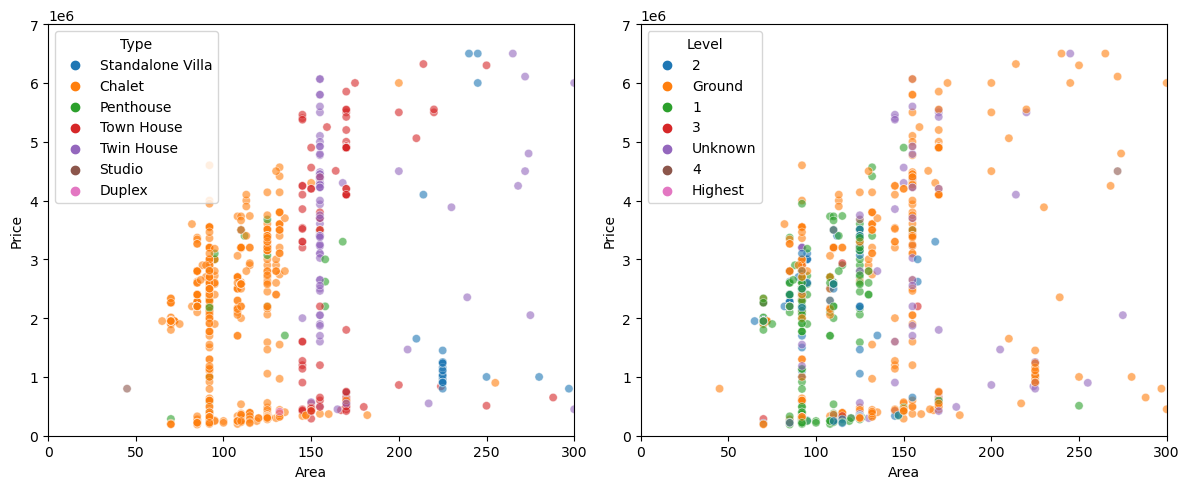

correlation between Price and Area: 0.4069970841520507
 
Frequent internal spaces of properties:
92.0     167
125.0     85
170.0     80
155.0     69
85.0      64
70.0      46
110.0     45
132.0     36
Name: Area, dtype: int64
 
Counts of properties by Type:
Chalet              523
Town House          138
Twin House           79
Standalone Villa     58
Penthouse            22
Studio                1
Duplex                1
Name: Type, dtype: int64


In [86]:
# an example of a Compound with moderately low correlation between Price and Area

# Mountain View North Coast

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
montview = df.loc[(df['Compound']=='Mountain View North Coast')]
# first
sns.scatterplot(data=montview, x='Area', y='Price', hue='Type', alpha=0.6, ax=axes[0])
axes[0].set_xlim(0, 300)
axes[0].set_ylim(0, 7000000)
# second
sns.scatterplot(data=montview, x='Area', y='Price', hue='Level', alpha=0.6, ax=axes[1])
axes[1].set_xlim(0, 300)
axes[1].set_ylim(0, 7000000)
plt.tight_layout()
plt.show()

# montview Area patterns
hi_area = montview.Area.value_counts().head(8)
# montview Type counts
type_presentation = montview.Type.value_counts()
# Price-Area correlation
corr_montview = montview['Price'].corr(montview['Area'])

print(f'correlation between Price and Area: {corr_montview}')
print(' ')
print(f'Frequent internal spaces of properties:\n{hi_area}')
print(' ')
print(f'Counts of properties by Type:\n{type_presentation}')


In [87]:
# properties counts by Type and Level _ Mountain View NC
tbl = montview.groupby(['Type', 'Level']).size().unstack()
tbl

Level                 1     2    3    4  Ground  Highest  Unknown
Type                                                             
Chalet            217.0  93.0  7.0  3.0   172.0      4.0     27.0
Duplex              NaN   NaN  NaN  NaN     1.0      NaN      NaN
Penthouse           NaN  17.0  2.0  2.0     NaN      NaN      1.0
Standalone Villa    1.0   2.0  NaN  NaN    35.0      NaN     20.0
Studio              NaN   NaN  NaN  NaN     1.0      NaN      NaN
Town House          7.0   2.0  NaN  NaN   103.0      NaN     26.0
Twin House          1.0   NaN  NaN  1.0    59.0      NaN     18.0

### 6.2.2 Compounds of Highest and lowest correlation coefficients

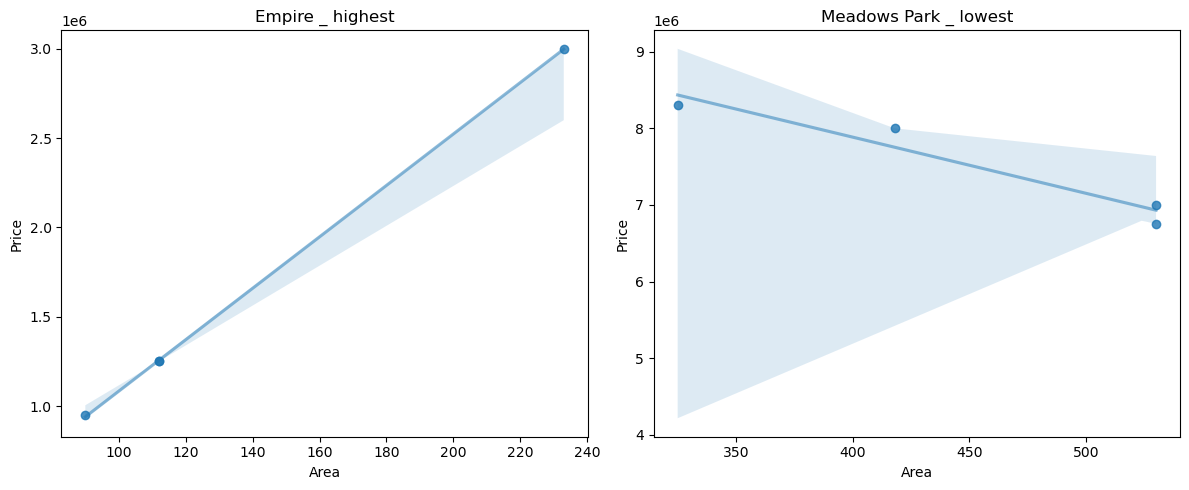

In [88]:
# Compounds of Highest and lowest correlation coefficients

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# highest
Empire = df.loc[(df['Compound']=='Empire')]
sns.regplot(data=Empire, x='Area', y='Price', scatter=True , ax=axes[0], line_kws={'alpha' : 0.5})
axes[0].set_title('Empire _ highest')

# lowest
Meadows_Park = df.loc[(df['Compound']=='Meadows Park')]
sns.regplot(data=Meadows_Park, x='Area', y='Price', scatter=True , ax=axes[1], line_kws={'alpha' : 0.5})
axes[1].set_title('Meadows Park _ lowest')

plt.tight_layout()
plt.show()

## Insights:
- The correlation coefficient is heavily influenced by the number of records within each compound (size of the sample).
- Therefore, the most extreme patterns (corr. = 1/-1) arise with small samples, which tend to give inaccurate impressions.
- The two charts above plot for compounds that represent 4 properties only, too small compared to others. e.g. Madinaty (1200+ properties).

### 6.2.3 What are the Average Prices of the top 10 cities by counts _ per Type?

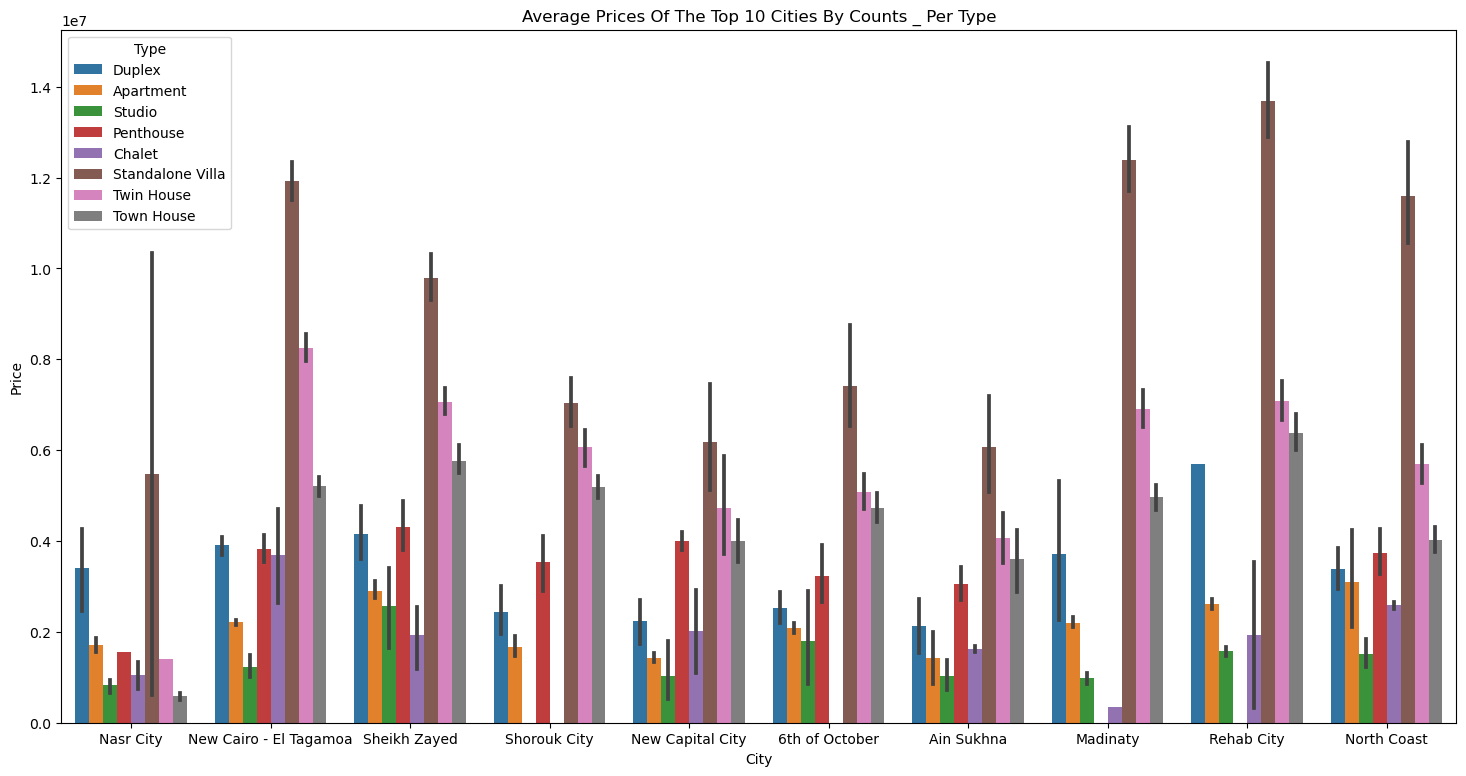

In [89]:
# Average Prices of the top 10 cities by counts _ per Type

plt.figure(figsize=(18,9))
data22 = df.loc[df['City'].isin(cn['city'][:10].to_list())]
sns.barplot(data=data22, x='City', y='Price', hue='Type',   palette='tab10')
plt.title('Average Prices of the top 10 cities by counts _ per Type'.title())
plt.show()
